<a href="https://colab.research.google.com/github/noushadkhan01/Projects/blob/master/Machine-Learning/Natural-Language-Processing/03_NLP_YELP_Review_classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing Project

In this NLP project we will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure than the lecture, since we will utilize the pipeline methods for more complex tasks.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

## Imports
 **Import the usual suspects. :) **

In [0]:
import numpy as np
import pandas as pd

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [0]:
yelp = pd.read_csv('https://bit.ly/2AKC247')

** Check the head, info , and describe methods on yelp.**

In [0]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [0]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [0]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Create a new column called "text length" which is the number of words in the text column.**

In [0]:
yelp['Id'] = pd.Series([i for i in range(len(yelp))])
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length,Id
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,0


In [0]:
yelp['text length'] = yelp['text'].apply(len)

# EDA

Let's explore the data

## Imports

**Import the data visualization libraries if you haven't done so already.**

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

**Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this**

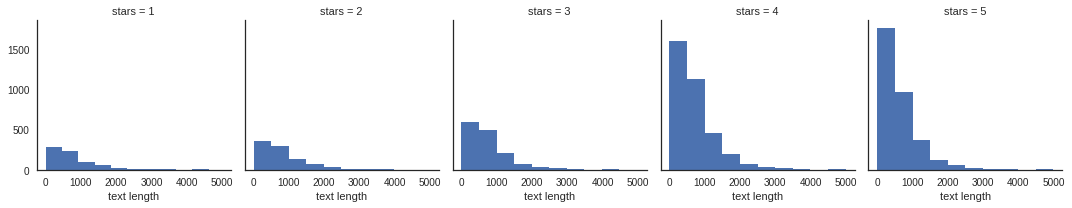

In [0]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

**Create a boxplot of text length for each star category.**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


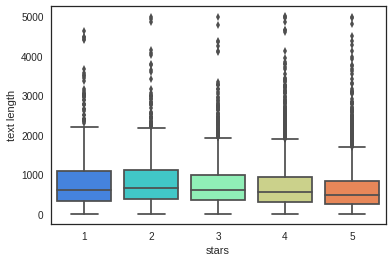

In [0]:
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')

**Create a countplot of the number of occurrences for each type of star rating.**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


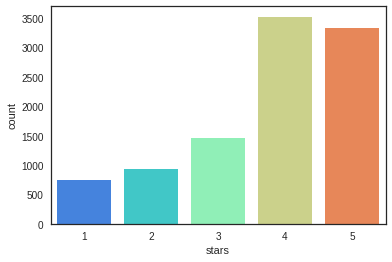

In [0]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

** Use groupby to get the mean values of the numerical columns:**

In [0]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Use the corr() method on that groupby dataframe to produce this dataframe:**

In [0]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

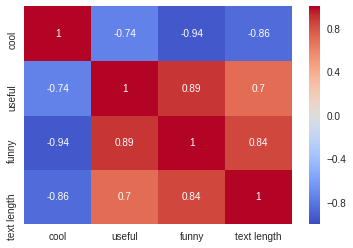

In [0]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

## NLP Classification Task

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [0]:
yelp.shape

(10000, 11)

In [0]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]
yelp_class.shape

(4086, 12)

In [0]:
yelp_class.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length,Id
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,0


** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [0]:
Id = yelp_class.Id
Id[:2]

0    0
1    1
Name: Id, dtype: int64

In [0]:
X = yelp_class['text']
y = yelp_class['stars']

In [0]:
X[:2]

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
Name: text, dtype: object

In [0]:
y[:2]

0    5
1    5
Name: stars, dtype: int64

#### Make a class of independent variable

In [0]:
y = y.replace([1, 5], [0, 1])
y[:2]

0    1
1    1
Name: stars, dtype: int64

# Text Preprocessing
**We can do these all things by sklearn's Countvectorizer but we are doing these all just for illustration purpose**

In [0]:
X[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

## Step 1
**remove punctuations from reviews**

In [0]:
import string

### illustrating step1

In [0]:
a = X[0]
import re
a = re.sub('[^a-zA-z]', ' ', a)
print(a)

My wife took me here on my birthday for breakfast and it was excellent   The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure   Our waitress was excellent and our food arrived quickly on the semi busy Saturday morning   It looked like the place fills up pretty quickly so the earlier you get here the better   Do yourself a favor and get their Bloody Mary   It was phenomenal and simply the best I ve ever had   I m pretty sure they only use ingredients from their garden and blend them fresh when you order it   It was amazing   While EVERYTHING on the menu looks excellent  I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious   It came with   pieces of their griddled bread with was amazing and it absolutely made the meal complete   It was the best  toast  I ve ever had   Anyway  I can t wait to go back 


## Step 2
**Make all letter lowercase such that Love and love have same meaning**

### illustrating step2

In [0]:
a = a.lower()
print(a)

my wife took me here on my birthday for breakfast and it was excellent   the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure   our waitress was excellent and our food arrived quickly on the semi busy saturday morning   it looked like the place fills up pretty quickly so the earlier you get here the better   do yourself a favor and get their bloody mary   it was phenomenal and simply the best i ve ever had   i m pretty sure they only use ingredients from their garden and blend them fresh when you order it   it was amazing   while everything on the menu looks excellent  i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious   it came with   pieces of their griddled bread with was amazing and it absolutely made the meal complete   it was the best  toast  i ve ever had   anyway  i can t wait to go back 


## Step 3
**Remove stopwords such that words's like (this, thats, in, I , my and many words are removed from the fetures because they don't have no meaning in our predictive modelling)**

### illustrating Step3

In [0]:
import nltk
#download nltk stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.corpus import stopwords

In [0]:
a = a.split()
a = [i for i in a if i not in stopwords.words('english')]
print(a)

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semi', 'busy', 'saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'bloody', 'mary', 'phenomenal', 'simply', 'best', 'ever', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'everything', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'ever', 'anyway', 'wait', 'go', 'back']


In [0]:
a = ' '.join(a)
print(a)

wife took birthday breakfast excellent weather perfect made sitting outside overlooking grounds absolute pleasure waitress excellent food arrived quickly semi busy saturday morning looked like place fills pretty quickly earlier get better favor get bloody mary phenomenal simply best ever pretty sure use ingredients garden blend fresh order amazing everything menu looks excellent white truffle scrambled eggs vegetable skillet tasty delicious came pieces griddled bread amazing absolutely made meal complete best toast ever anyway wait go back


## Step 4
**stemming to convert Loved to Love because they both have same meaning so we need to convert these words this is called stemmingn**

### illustrating stemming

In [0]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
a = a.split()
a = [ps.stem(i) for i in a]
a = ' '.join(a)
print(a)

wife took birthday breakfast excel weather perfect made sit outsid overlook ground absolut pleasur waitress excel food arriv quickli semi busi saturday morn look like place fill pretti quickli earlier get better favor get bloodi mari phenomen simpli best ever pretti sure use ingredi garden blend fresh order amaz everyth menu look excel white truffl scrambl egg veget skillet tasti delici came piec griddl bread amaz absolut made meal complet best toast ever anyway wait go back


In [0]:
X1 = []
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
for i in X:
  #step 1- to remove punctuation
  i = re.sub('[^a-zA-z]', ' ', i)
  
  #step 2- to lowercase letters
  i = i.lower()
  
  #step 3- to remove stopwords
  i = i.split()
  i = [j for j in i if j not in set(stopwords.words('english'))] #we are using set for increasing the speed of program
  
  #step 4- to stemming the words
  ps = PorterStemmer()
  i = [ps.stem(j) for j in i]
  i = ' '.join(i)
  X1.append(i)
  
  
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
print(X1[:1])

['wife took birthday breakfast excel weather perfect made sit outsid overlook ground absolut pleasur waitress excel food arriv quickli semi busi saturday morn look like place fill pretti quickli earlier get better favor get bloodi mari phenomen simpli best ever pretti sure use ingredi garden blend fresh order amaz everyth menu look excel white truffl scrambl egg veget skillet tasti delici came piec griddl bread amaz absolut made meal complet best toast ever anyway wait go back']


# Create Sparse Matrix from text
- Method1 -- **CountVectorizer** --> it doesn't normalize it's output
- Method2 -- **TfidfVectorize** ---> it normalize it's output

## Train Test Split

Let's split our data into training and testing data.

** Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **

In [0]:
from sklearn.model_selection import train_test_split

**We are using all methods for text preprocessing from CountVectorizer so we are choosing X**

In [0]:
X = X.values
X1 = np.array([X1])
X.shape, X1.shape

((4086,), (1, 4086))

In [0]:
X1 = X1.T
X1.shape

(4086, 1)

In [0]:
feature1 = np.concatenate((X.T.reshape(-1, 1), Id.T.reshape(-1, 1)), 1)
feature2 = np.concatenate((X1, Id.T.reshape(-1, 1)), 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [0]:
feature1[:2]

array([['My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!',
        0],
       ['I have no idea why some people give bad reviews about this place. It

In [0]:
feature2[:2]

array([['wife took birthday breakfast excel weather perfect made sit outsid overlook ground absolut pleasur waitress excel food arriv quickli semi busi saturday morn look like place fill pretti quickli earlier get better favor get bloodi mari phenomen simpli best ever pretti sure use ingredi garden blend fresh order amaz everyth menu look excel white truffl scrambl egg veget skillet tasti delici came piec griddl bread amaz absolut made meal complet best toast ever anyway wait go back',
        '0'],
       ['idea peopl give bad review place goe show pleas everyon probabl gripe someth fault mani peopl like case friend arriv pm past sunday pretti crowd thought sunday even thought would wait forev get seat said seat girl come back seat someon els seat waiter came got drink order everyon pleasant host seat us waiter server price good well place order decid want share bake spaghetti calzon small beef pizza tri calzon huge got smallest one person got small pizza awesom friend like pizza bett

In [0]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(feature2, y,test_size=0.3,random_state=101)
X_train, X_test, y_train, y_test = train_test_split(feature1, y,test_size=0.3,random_state=101)

In [0]:
X_train_id = X_train1[:, 1]
X_train_id[:2]

array(['3608', '2397'], dtype='<U3049')

In [0]:
X_train_id = np.array([int(i) for i in X_train_id])
X_train_id[:2]

array([3608, 2397])

In [0]:
X_test_id = X_test[:, 1]
X_test_id = np.array([int(i) for i in X_test_id])
X_test_id[:2]

array([2414, 3552])

# 1. CountVectorizer

**Import CountVectorizer and create a CountVectorizer object.**

class sklearn.feature_extraction.text.**CountVectorizer(input=’content’, encoding=’utf-8’, decode_error=’strict’, strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern=’(?u)\b\w\w+\b’, ngram_range=(1, 1), analyzer=’word’, max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class ‘numpy.int64’>)**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english', max_features = None) #max_featurs = how many important features we want to extract from our data as as column

** Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

**sklearn's features extraction sparse matrix shape**

In [0]:
X1_train = cv.fit_transform(X_train[:, 0]).toarray()
X1_test = cv.transform(X_test[:, 0]).toarray()
X1_train.shape, X1_test.shape

((2860, 15936), (1226, 15936))

**out feature extracted sparse matrix shape**

In [0]:
X2_train = cv.fit_transform(X_train1[:, 0]).toarray()
X2_test  = cv.transform(X_test1[:, 0]).toarray()
X2_train.shape, X2_test.shape

((2860, 10950), (1226, 10950))

**so we are choosing our features extracted sparse matrix**

In [0]:
X1_train[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [0]:
X2_train[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### final train test split without cfu(cool, funny, useful)

In [0]:
X_train1 = X2_train.copy()
X_test1 = X2_test.copy()
X_train1.shape, X_test1.shape

((2860, 10950), (1226, 10950))

### now we are combining our cfu with sparse matrix

In [0]:
X_train2 = np.concatenate((X_train1, yelp_class[yelp_class['Id'].isin(X_train_id)][['cool', 'funny', 'useful']].values), axis = 1)
X_test2 = np.concatenate((X_test1, yelp_class[yelp_class['Id'].isin(X_test_id)][['cool', 'funny', 'useful']].values), axis = 1)
X_train2.shape, X_test2.shape

((2860, 10953), (1226, 10953))

## Training a Model

Time to train a model!

** Import MultinomialNB and create an instance of the estimator and call is nb **

In [0]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Now fit nb using the training data.**

In [0]:
nb.fit(X_train1,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
print(f'Train score is {nb.score(X_train1, y_train)}')
print(f'Test score is {nb.score(X_test1, y_test)}')

Train score is 0.9783216783216783
Test score is 0.9208809135399674


## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [0]:
predictions = nb.predict(X_test1)

** Create a confusion matrix and classification report using these predictions and y_test **

In [0]:
from sklearn.metrics import confusion_matrix,classification_report

In [0]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[160  68]
 [ 29 969]]


             precision    recall  f1-score   support

          0       0.85      0.70      0.77       228
          1       0.93      0.97      0.95       998

avg / total       0.92      0.92      0.92      1226



### using cool, useful, funny

In [0]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [0]:
nb.fit(X_train2,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
print(f'Train score is {nb.score(X_train2, y_train)}')
print(f'Test score is {nb.score(X_test2, y_test)}')

Train score is 0.9706293706293706
Test score is 0.9225122349102773


**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [0]:
from sklearn.feature_extraction.text import  TfidfTransformer

** Import Pipeline from sklearn. **

In [0]:
from sklearn.pipeline import Pipeline

** Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [0]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words = 'english')),  # strings to token integer counts
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

## Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [0]:
X = yelp_class['text']
y = yelp_class['stars']
y = y.replace([1, 5], [0, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

**Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

In [0]:
# May take some time
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

In [0]:
predictions = pipeline.predict(X_test)

In [0]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[157  71]
 [ 23 975]]
             precision    recall  f1-score   support

          0       0.87      0.69      0.77       228
          1       0.93      0.98      0.95       998

avg / total       0.92      0.92      0.92      1226



# PCA

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components = 3)

In [0]:
X_train_pca = pca.fit_transform(X_train2)
X_test_pca = pca.transform(X_test2)

In [0]:
pca.explained_variance_ratio_

array([0.15600584, 0.03397545, 0.01819465])

In [0]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_pca,y_train)
print(f'Train score is {nb.score(X_train_pca, y_train)}')
print(f'Test score is {nb.score(X_test_pca, y_test)}')
predictions = nb.predict(X_test_pca)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

Train score is 0.8066433566433566
Test score is 0.8042414355628059
[[ 21 207]
 [ 33 965]]


             precision    recall  f1-score   support

          0       0.39      0.09      0.15       228
          1       0.82      0.97      0.89       998

avg / total       0.74      0.80      0.75      1226

